In [1]:
#IMPORT necessary libraries
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
#import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('dataset - dataset01.csv')
data.head(5)

,screen_name,description,location,user_id,favourites_count,followers_count,friends_count,listed_count,media_count,statuses_count,conversation_id,full_text,reply_count,retweet_count,favorite_count,hashtags,created_at,user_mentions
0,bscrw,We are an ISP providing world class broadband ...,"Kigali, Rwanda",417707564.0,99,1206,574,4,557,1070,1.550000e+18,Quality #connectivity solutions enable E-healt...,0,0,1,4,2022-07-28T09:38:50.000Z,0
1,bscrw,We are an ISP providing world class broadband ...,"Kigali, Rwanda",417707564.0,99,1206,574,4,557,1070,1.550000e+18,Make sure your loved ones are protected with o...,0,2,3,3,2022-07-27T14:05:25.000Z,0
2,bscrw,We are an ISP providing world class broadband ...,"Kigali, Rwanda",417707564.0,99,1206,574,4,557,1070,1.550000e+18,Our #connectivity solutions will keep you conn...,0,2,1,3,2022-07-26T08:56:30.000Z,0
3,bscrw,We are an ISP providing world class broadband ...,"Kigali, Rwanda",417707564.0,99,1206,574,4,557,1070,1.550000e+18,"New week, new opportunities, more productivity...",0,1,3,2,2022-07-25T08:57:36.000Z,0
4,bscrw,We are an ISP providing world class broadband ...,"Kigali, Rwanda",417707564.0,99,1206,574,4,557,1070,1.550000e+18,We wish you a fun-filled #Sunday with your lov...,0,0,1,1,2022-07-24T14:58:18.000Z,0


## cleaning dataset

In [3]:
data.isnull().sum()

screen_name          0
description         37
location            86
user_id              0
favourites_count     0
followers_count      0
friends_count        0
listed_count         0
media_count          0
statuses_count       0
conversation_id      0
full_text            0
reply_count          0
retweet_count        0
favorite_count       0
hashtags             0
created_at           0
user_mentions        0
dtype: int64

In [4]:
data= data.fillna(0)

In [5]:
#removing unwanted colomns
data.drop(['description'], axis=1, inplace=True)

In [6]:
# remove duplicates
data = data.loc[:,~data.columns.duplicated()].copy()

In [7]:
#convert created-at column to datetime
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   screen_name       1612 non-null   object             
 1   location          1612 non-null   object             
 2   user_id           1612 non-null   float64            
 3   favourites_count  1612 non-null   int64              
 4   followers_count   1612 non-null   int64              
 5   friends_count     1612 non-null   int64              
 6   listed_count      1612 non-null   int64              
 7   media_count       1612 non-null   int64              
 8   statuses_count    1612 non-null   int64              
 9   conversation_id   1612 non-null   float64            
 10  full_text         1612 non-null   object             
 11  reply_count       1612 non-null   int64              
 12  retweet_count     1612 non-null   int64              
 13  fav

## cleaning text

In [9]:
tweets= data['full_text']
tweets

0       Quality #connectivity solutions enable E-healt...
1       Make sure your loved ones are protected with o...
2       Our #connectivity solutions will keep you conn...
3       New week, new opportunities, more productivity...
4       We wish you a fun-filled #Sunday with your lov...
                              ...                        
1607    @Anonymous_933k @bscrw No! Let me try it becau...
1608    #Cosign @bscrw RT @nicpottier\n@kLabRW interne...
1609    attending a 3-day training at @bscrw, cloud co...
1610    @bscrw I m really happy with your Broadband In...
1611              @gracetandeamara and free modems?@bscrw
Name: full_text, Length: 1612, dtype: object

In [10]:
import re
#cleaning tweets
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.,*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [11]:
results = [clean_tweet(tw) for tw in tweets]
results

['quality solutions enable e health ambitions overall efficiency contact us 4141 learn more',
 'make sure your loved ones are protected with our solutions contact us 4141 get started',
 'our solutions will keep you connected all your organizational needs contact us 4141 get started',
 'new week new opportunities more productivity our cloud computing services enable you run your business activities stress free contact us 4141 get started',
 'we wish you fun filled with your loved ones',
 'enjoy your weekend with our super fast reliable 4g network contact us 4141 get connected',
 'switch flex faiba enjoy high speed fiber internet your business operations contact us 4141 get connected',
 'we are your ideal business partner all your needs contact us 4141 learn more about how we can connect your business',
 'bsc s 4g internet has everything you need your day day activities contact us 4141 get connected',
 'reduce your vulnerability cyber attacks below are few tips',
 '',
 'happy liberation 

In [12]:
data['text']= results

In [33]:
data.head

<bound method NDFrame.head of       screen_name  location  user_id  favourites_count  followers_count  \
0              76        41        9                99             1206   
1              76        41        9                99             1206   
2              76        41        9                99             1206   
3              76        41        9                99             1206   
4              76        41        9                99             1206   
...           ...       ...      ...               ...              ...   
1607          180        37      183             14658             1833   
1608          154        55      220              5129             3272   
1609          242        32      178                19              567   
1610          139        73      194              3067              308   
1611          179        41      232              6087              772   

      friends_count  listed_count  media_count  statuses_count  \
0  

In [14]:
#removing unwanted colomns
data.drop(['full_text'], axis=1, inplace=True)

### polarity 

In [17]:
from textblob import TextBlob

data['polarity'] = TextBlob(str(data['text'])).sentiment.polarity

In [19]:
data.to_csv('clean_data.csv', index=False, encoding='utf-8')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   screen_name       1612 non-null   object             
 1   location          1612 non-null   object             
 2   user_id           1612 non-null   float64            
 3   favourites_count  1612 non-null   int64              
 4   followers_count   1612 non-null   int64              
 5   friends_count     1612 non-null   int64              
 6   listed_count      1612 non-null   int64              
 7   media_count       1612 non-null   int64              
 8   statuses_count    1612 non-null   int64              
 9   conversation_id   1612 non-null   float64            
 10  reply_count       1612 non-null   int64              
 11  retweet_count     1612 non-null   int64              
 12  favorite_count    1612 non-null   int64              
 13  has

## feature engneering

In [25]:
data['location'] = data['location'].astype('string')
data['text'] = data['text'].astype('string')
data['screen_name'] = data['screen_name'].astype('string')
data['polarity'] = data['polarity'].astype('string')
data['user_id'] = data['user_id'].astype('string')

In [26]:
#label incoding



from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['text'] = enc.fit_transform(data['text'])
data['location'] = enc.fit_transform(data['location'])
data['screen_name'] = enc.fit_transform(data['screen_name'])
data['polarity'] = enc.fit_transform(data['polarity'])
data['user_id'] = enc.fit_transform(data['user_id'])

In [30]:
data_pos = data[data['polarity'] == 1]
data_neg = data[data['polarity'] == 0]

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   screen_name       1612 non-null   int32              
 1   location          1612 non-null   int32              
 2   user_id           1612 non-null   int32              
 3   favourites_count  1612 non-null   int64              
 4   followers_count   1612 non-null   int64              
 5   friends_count     1612 non-null   int64              
 6   listed_count      1612 non-null   int64              
 7   media_count       1612 non-null   int64              
 8   statuses_count    1612 non-null   int64              
 9   conversation_id   1612 non-null   float64            
 10  reply_count       1612 non-null   int64              
 11  retweet_count     1612 non-null   int64              
 12  favorite_count    1612 non-null   int64              
 13  has

### correlation

[Text(0.5, 0, 'screen_name'),
 Text(1.5, 0, 'location'),
 Text(2.5, 0, 'user_id'),
 Text(3.5, 0, 'favourites_count'),
 Text(4.5, 0, 'followers_count'),
 Text(5.5, 0, 'friends_count'),
 Text(6.5, 0, 'listed_count'),
 Text(7.5, 0, 'media_count'),
 Text(8.5, 0, 'statuses_count'),
 Text(9.5, 0, 'conversation_id'),
 Text(10.5, 0, 'reply_count'),
 Text(11.5, 0, 'retweet_count'),
 Text(12.5, 0, 'favorite_count'),
 Text(13.5, 0, 'hashtags'),
 Text(14.5, 0, 'user_mentions'),
 Text(15.5, 0, 'text'),
 Text(16.5, 0, 'polarity')]

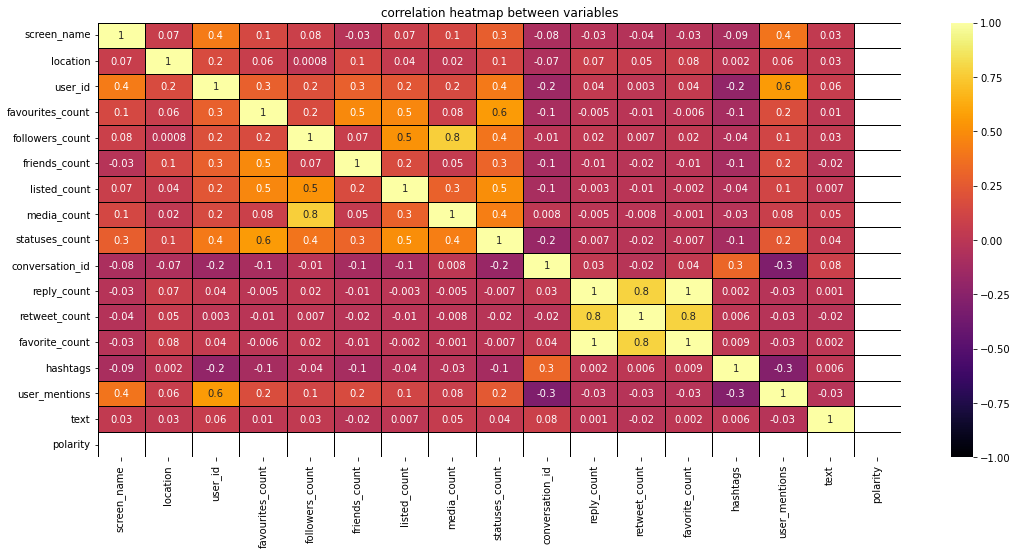

In [29]:
fig = (18,8)
plt.figure(figsize=fig)
heatmap = sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('correlation heatmap between variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

## model development

###### spliting data